In [2]:
 #! pip install xgboost
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1
#!pip install optuna

In [3]:
import optuna
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [4]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')



In [5]:
data_fin_imprt.head(15)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,False,False,False,True,False,False,False,False,True,False
5,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,...,False,False,False,True,False,False,False,False,True,False
6,4.795791,3.737670,8.501267,8,1.791759,7.601902,2001,0.000000,6.424869,0.000000,...,False,False,False,True,False,False,False,False,True,False
7,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,...,False,False,False,True,False,False,False,False,True,False
8,4.795791,3.688879,8.592301,8,1.791759,7.598900,1996,0.000000,7.074117,0.000000,...,False,False,False,True,False,False,False,False,True,False
9,4.110874,4.110874,8.922792,7,1.791759,7.600902,1999,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [6]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
xgb_mod = xgb.XGBRegressor()
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [8]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,xgb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

XGB Regression Model Score  :  0.998
R Sq. Value :  0.92
Adjusted R Sq. Value is :  0.907
Mean Square Error is :  0.016
Root Mean Square Error is :  0.125
Mean Absoulue Error is :  0.085
Accuracy : 88.75 %


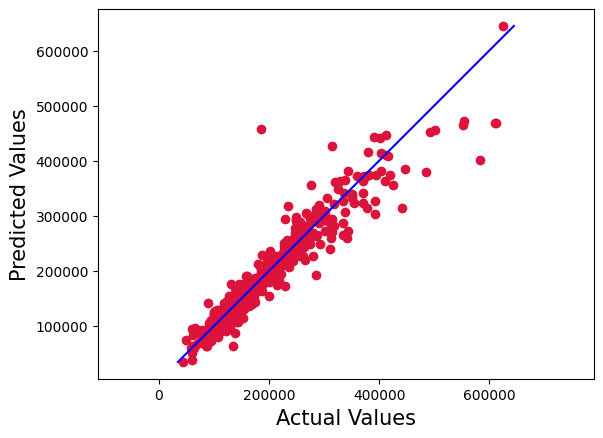

In [9]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-10-6dac944a4e02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


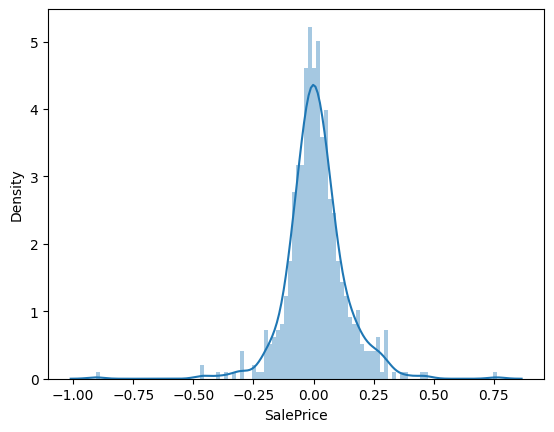

In [10]:
sb.distplot((y_test-xgb_pred),bins=100);

In [11]:
params = {
        'objective' : ['reg:squarederror','reg:linear'],
        'min_child_weight': [1,2],
        'gamma': [0.5, 1],
        'subsample': [0.2, 0.4],
        'max_depth': [1, 2]
        }

In [12]:
# G_CV_lin_rid = GridSearchCV(estimator=xgb_mod, param_grid=params, cv= 5)
# #  using grid search method to optimise model with hyperparameter tuning

# G_CV_lin_rid.fit(x_train, y_train)# fitting the model
# G_CV_lin_rid.best_params_ # displaying optimised parameters for optimal tuning of model

In [25]:
#gridsearchcv best hyperparameters
xgb_mod = xgb.XGBRegressor(objective="reg:squarederror", max_depth=10,gamma=0.001,min_child_weight=50,subsample=1)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [26]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,xgb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

XGB Regression Model Score  :  0.984
R Sq. Value :  0.93
Adjusted R Sq. Value is :  0.924
Mean Square Error is :  0.013
Root Mean Square Error is :  0.125
Mean Absoulue Error is :  0.082
Accuracy : 89.47 %


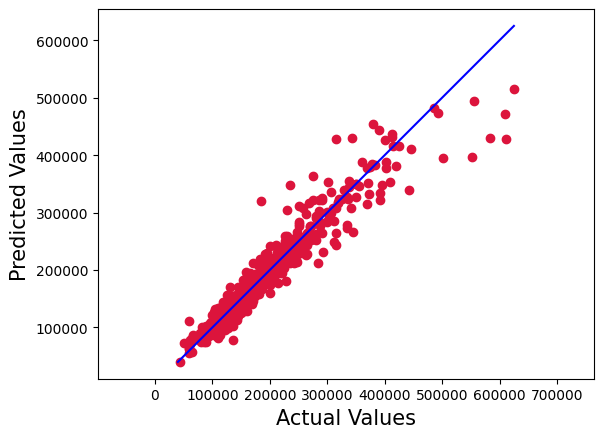

In [27]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-28-6dac944a4e02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


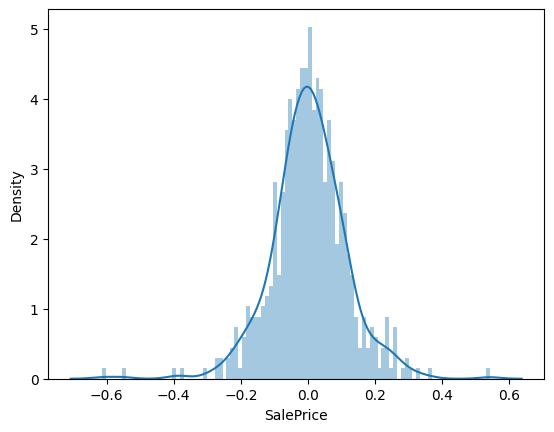

In [28]:
sb.distplot((y_test-xgb_pred),bins=100);

In [13]:
# xgboost optuna with same hyperparamter space as parent paper gridsearchcv
def objective(trial):
    # Define hyperparameter search space
    param = {
        #'verbosity': 0,
        'objective': 'reg:squarederror',
        'min_child_weight': trial.suggest_int('min_child_weight', 1,2),
        'gamma': trial.suggest_int('gamma', 0.5, 1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 9)
        #'booster': 'gbtree',
        #'eta': trial.suggest_loguniform('eta', 1e-3, 1e-1),
        #'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        #'lambda': trial.suggest_loguniform('lambda', 1e-3, 1.0),
        #'alpha': trial.suggest_loguniform('alpha', 1e-3, 1.0)
    }
    # Train model
    model = xgb.XGBRegressor(**param)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)],  verbose=False)

    # Predict and evaluate
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-02-20 19:13:16,857] A new study created in memory with name: no-name-a1beddbe-8302-4000-8ca3-8fb02b4b15a3
<ipython-input-13-70dd9808686c>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
[I 2025-02-20 19:13:17,689] Trial 0 finished with value: 0.11429238807189819 and parameters: {'min_child_weight': 1, 'gamma': 0, 'subsample': 0.645781665505873, 'max_depth': 3}. Best is trial 0 with value: 0.11429238807189819.
<ipython-input-13-70dd9808686c>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
[I 2025-02-20 19:13:18,920] Trial 1 finished with value: 0.12046626678623244 and parameters: 

Number of finished trials: 50
Best trial:
Best RMSE: 0.10599506640296366
Best Hyperparameters: {'min_child_weight': 2, 'gamma': 0, 'subsample': 0.9933641501802251, 'max_depth': 4}


GridSearch XGBoost: {'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.6}

In [14]:
xgb_mod = xgb.XGBRegressor(objective="reg:squarederror", max_depth=4,gamma=0,min_child_weight=2,subsample=0.9934601581343028,)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [15]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,xgb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

XGB Regression Model Score  :  0.984
R Sq. Value :  0.94
Adjusted R Sq. Value is :  0.931
Mean Square Error is :  0.012
Root Mean Square Error is :  0.125
Mean Absoulue Error is :  0.076
Accuracy : 89.65 %


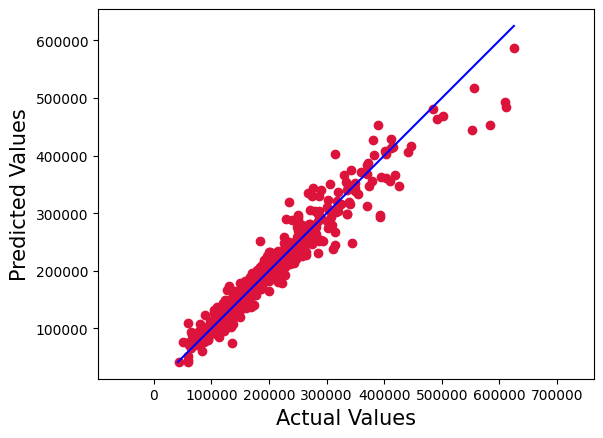

In [16]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-17-6dac944a4e02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


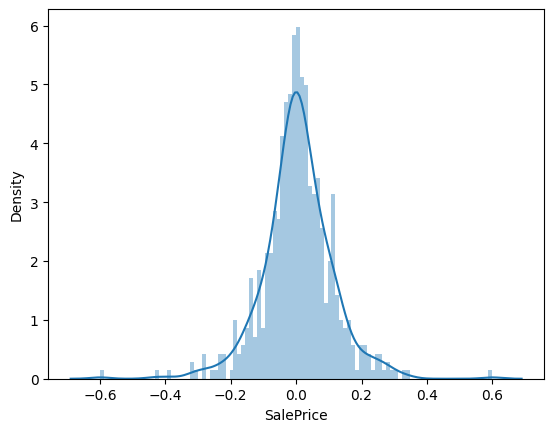

In [17]:
sb.distplot((y_test-xgb_pred),bins=100);

In [19]:
# xgboost optuna with bigger hyperparamter space
def objective(trial):
    # Define hyperparameter search space
    param = {
        #'verbosity': 0,
        'objective': 'reg:squarederror',
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_int('gamma', 0.1, 1),
        'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000, step=100),
        'learning_rate': trial.suggest_uniform("learning_rate", 0.01, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0, 1.0)
    }
    # Train model
    model = xgb.XGBRegressor(**param)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)],  verbose=False)

    # Predict and evaluate
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-02-20 19:18:59,025] A new study created in memory with name: no-name-d36a7e7d-aa74-469f-aa7b-bb4ae71ad5f9
<ipython-input-19-553b5e892e49>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
<ipython-input-19-553b5e892e49>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform("learning_rate", 0.01, 1.0),
<ipython-input-19-553b5e892e49>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0, 1.0)
[I 2025-02-20 

Number of finished trials: 50
Best trial:
Best RMSE: 0.10323634383734824
Best Hyperparameters: {'min_child_weight': 16, 'gamma': 0, 'subsample': 0.36544411314101105, 'max_depth': 11, 'n_estimators': 500, 'learning_rate': 0.029847828010809183, 'colsample_bytree': 0.4171190180206572}


In [20]:
xgb_mod = xgb.XGBRegressor(objective="reg:squarederror", min_child_weight = 16, gamma = 0, sub_sample = 0.36544411314101105,
                           max_depth = 11, n_estimators = 500, learning_rate= 0.029847828010809183, colsample_bytree = 0.417119018020657)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


In [21]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,xgb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

XGB Regression Model Score  :  0.99
R Sq. Value :  0.94
Adjusted R Sq. Value is :  0.93
Mean Square Error is :  0.012
Root Mean Square Error is :  0.125
Mean Absoulue Error is :  0.073


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings

Accuracy : 91.02 %


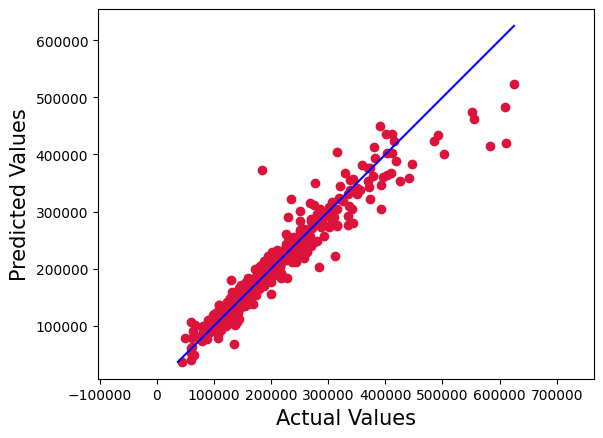

In [22]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-23-6dac944a4e02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


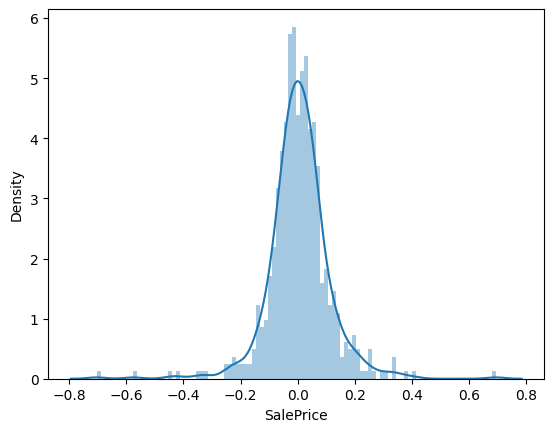

In [23]:
sb.distplot((y_test-xgb_pred),bins=100);

<Axes: >

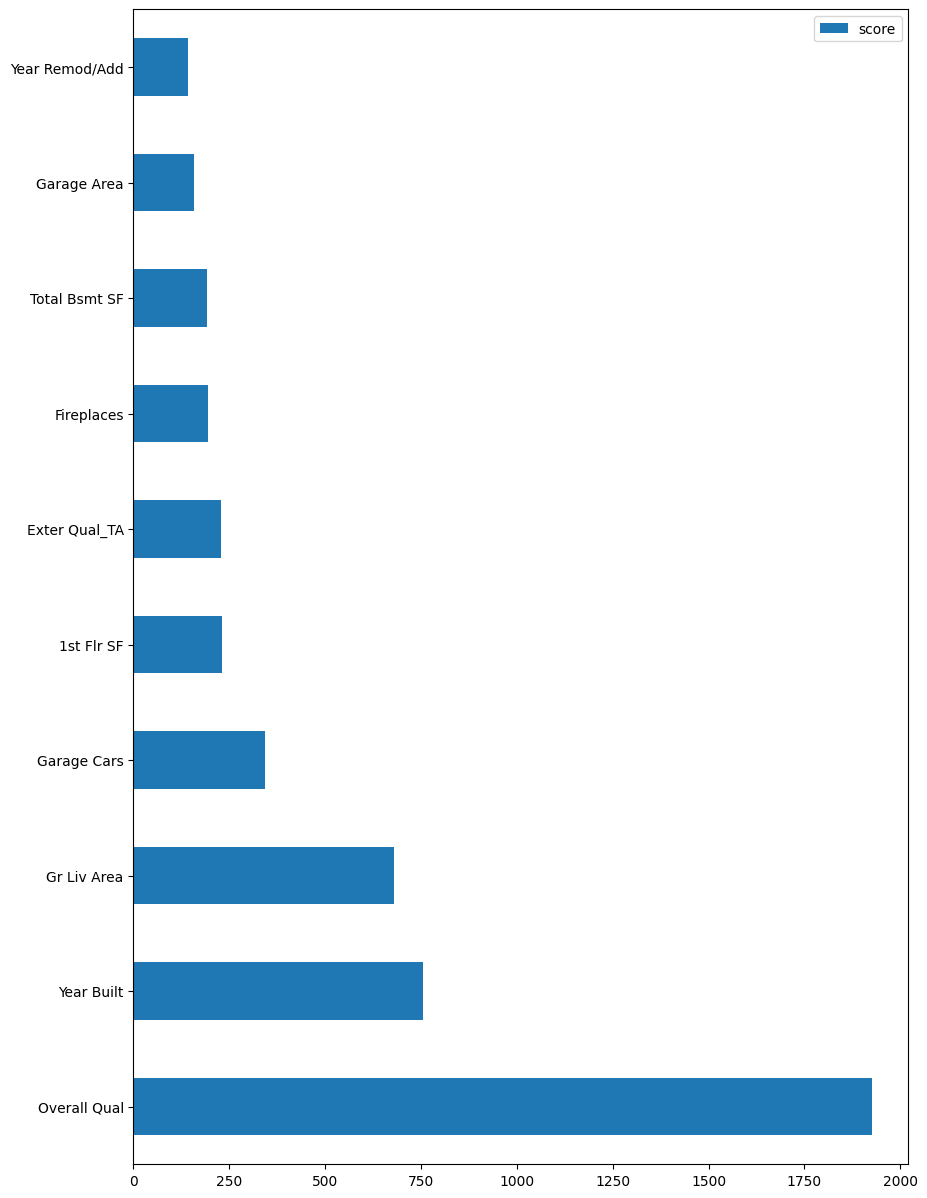

In [24]:
feature_important = xgb_mod.get_booster().get_score(importance_type='total_gain')


keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (10,15)) ## plot top 10 features